x: (100, 2), weights: (2, 1), bias: (1,), y: (100, 1)


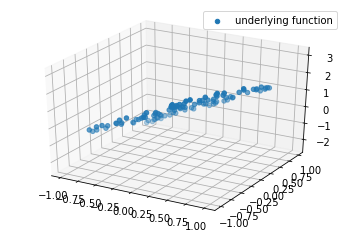

In [11]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

d = 2
x = np.random.uniform(-1, 1, (100, d))

# y = w * x + b
# y = w_0 * x_0 + w_1 * x_1 + b
# y = w@x + b

weights_true = np.array([[2, -1], ]).T
bias_true = np.array([0.5])

y_true = x @ weights_true + bias_true
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

def plot_3d(x, y, y_pred=None):
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(x[:, 0], x[:, 1], y, label='underlying function')
  if y_pred is not None:
    ax.scatter(x[:, 0], x[:, 1], y_pred, label='our function')
  plt.legend()

plot_3d(x, y_true)

In [12]:
class MSE:
  def __call__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    return ((y_pred - y_true) ** 2).mean()

  def backward(self):
    n = self.y_true.shape[0]
    self.gradient = 2. * (self.y_pred - self.y_true) / n
    return self.gradient

class Linear:
  def __init__(self, input_dim, num_hidden = 1):
    self.weights = np.random.rand(input_dim, num_hidden)
    self.bias = np.random.rand(num_hidden)
  
  def __call__(self, x):
    self.x = x
    output = x @ self.weights + self.bias
    return output

  def backward(self, gradient):
    self.weights_gradient = self.x.T @ gradient
    self.bias_gradient = gradient.sum(axis=0)

  def update(self, lr):
    self.weights = self.weights - lr * self.weights_gradient
    self.bias = self.bias - lr * self.bias_gradient

loss 1.617352766808161


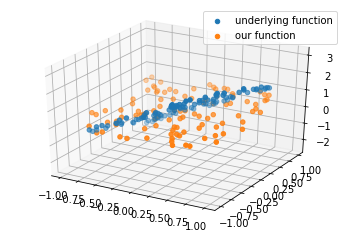

In [13]:
loss = MSE()
linear = Linear(2)
y_pred = linear(x)
print('loss' , loss(y_pred, y_true))
fig = plot_3d(x, y_true, y_pred)

Epoch 0, loss 1.617352766808161
Epoch 1, loss 1.396847847496828
Epoch 2, loss 1.2099886568681375
Epoch 3, loss 1.050494918693164
Epoch 4, loss 0.9135978784198268
Epoch 5, loss 0.7955929958920911
Epoch 6, loss 0.6935411344851511
Epoch 7, loss 0.605066395923495
Epoch 8, loss 0.5282172177733444
Epoch 9, loss 0.46136919130923487
Epoch 10, loss 0.40315565581969937
Epoch 11, loss 0.35241700712486546
Epoch 12, loss 0.3081627993632538
Epoch 13, loss 0.26954274472720635
Epoch 14, loss 0.2358240257034864
Epoch 15, loss 0.20637318457643075
Epoch 16, loss 0.1806414095038893
Epoch 17, loss 0.15815240050903456
Epoch 18, loss 0.1384922396715869
Epoch 19, loss 0.1213008509401721


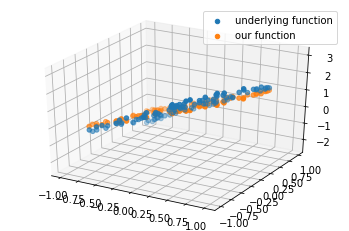

In [14]:
def fit(x, y, model, loss, lr, num_epochs):
  for epoch in range(num_epochs):
    y_pred = model(x)
    loss_value = loss(y_pred, y)
    print(f'Epoch {epoch}, loss {loss_value}')
    gradient_from_loss = loss.backward()
    model.backward(gradient_from_loss)
    model.update(lr)

fit(x, y_true, model=linear, loss=loss, lr=0.1, num_epochs=20)
plot_3d(x, y_true, linear(x))